 Unemployment Analysis with Python
 (By-Aditi Mishra)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv("/content/Unemployment in India.csv")


In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [8]:
dup = df.duplicated().sum()

In [9]:
df.isnull().sum()

,0
Region,14
Date,14
Frequency,14
Estimated Unemployment Rate (%),14
Estimated Employed,14
Estimated Labour Participation Rate (%),14
Area,14


In [15]:
#Renaming column names
df.columns= ["Region","Date","Frequency","Estimate Jobless Rate","Estimate Employed","Estimate Labour Participation Rate","Area"]

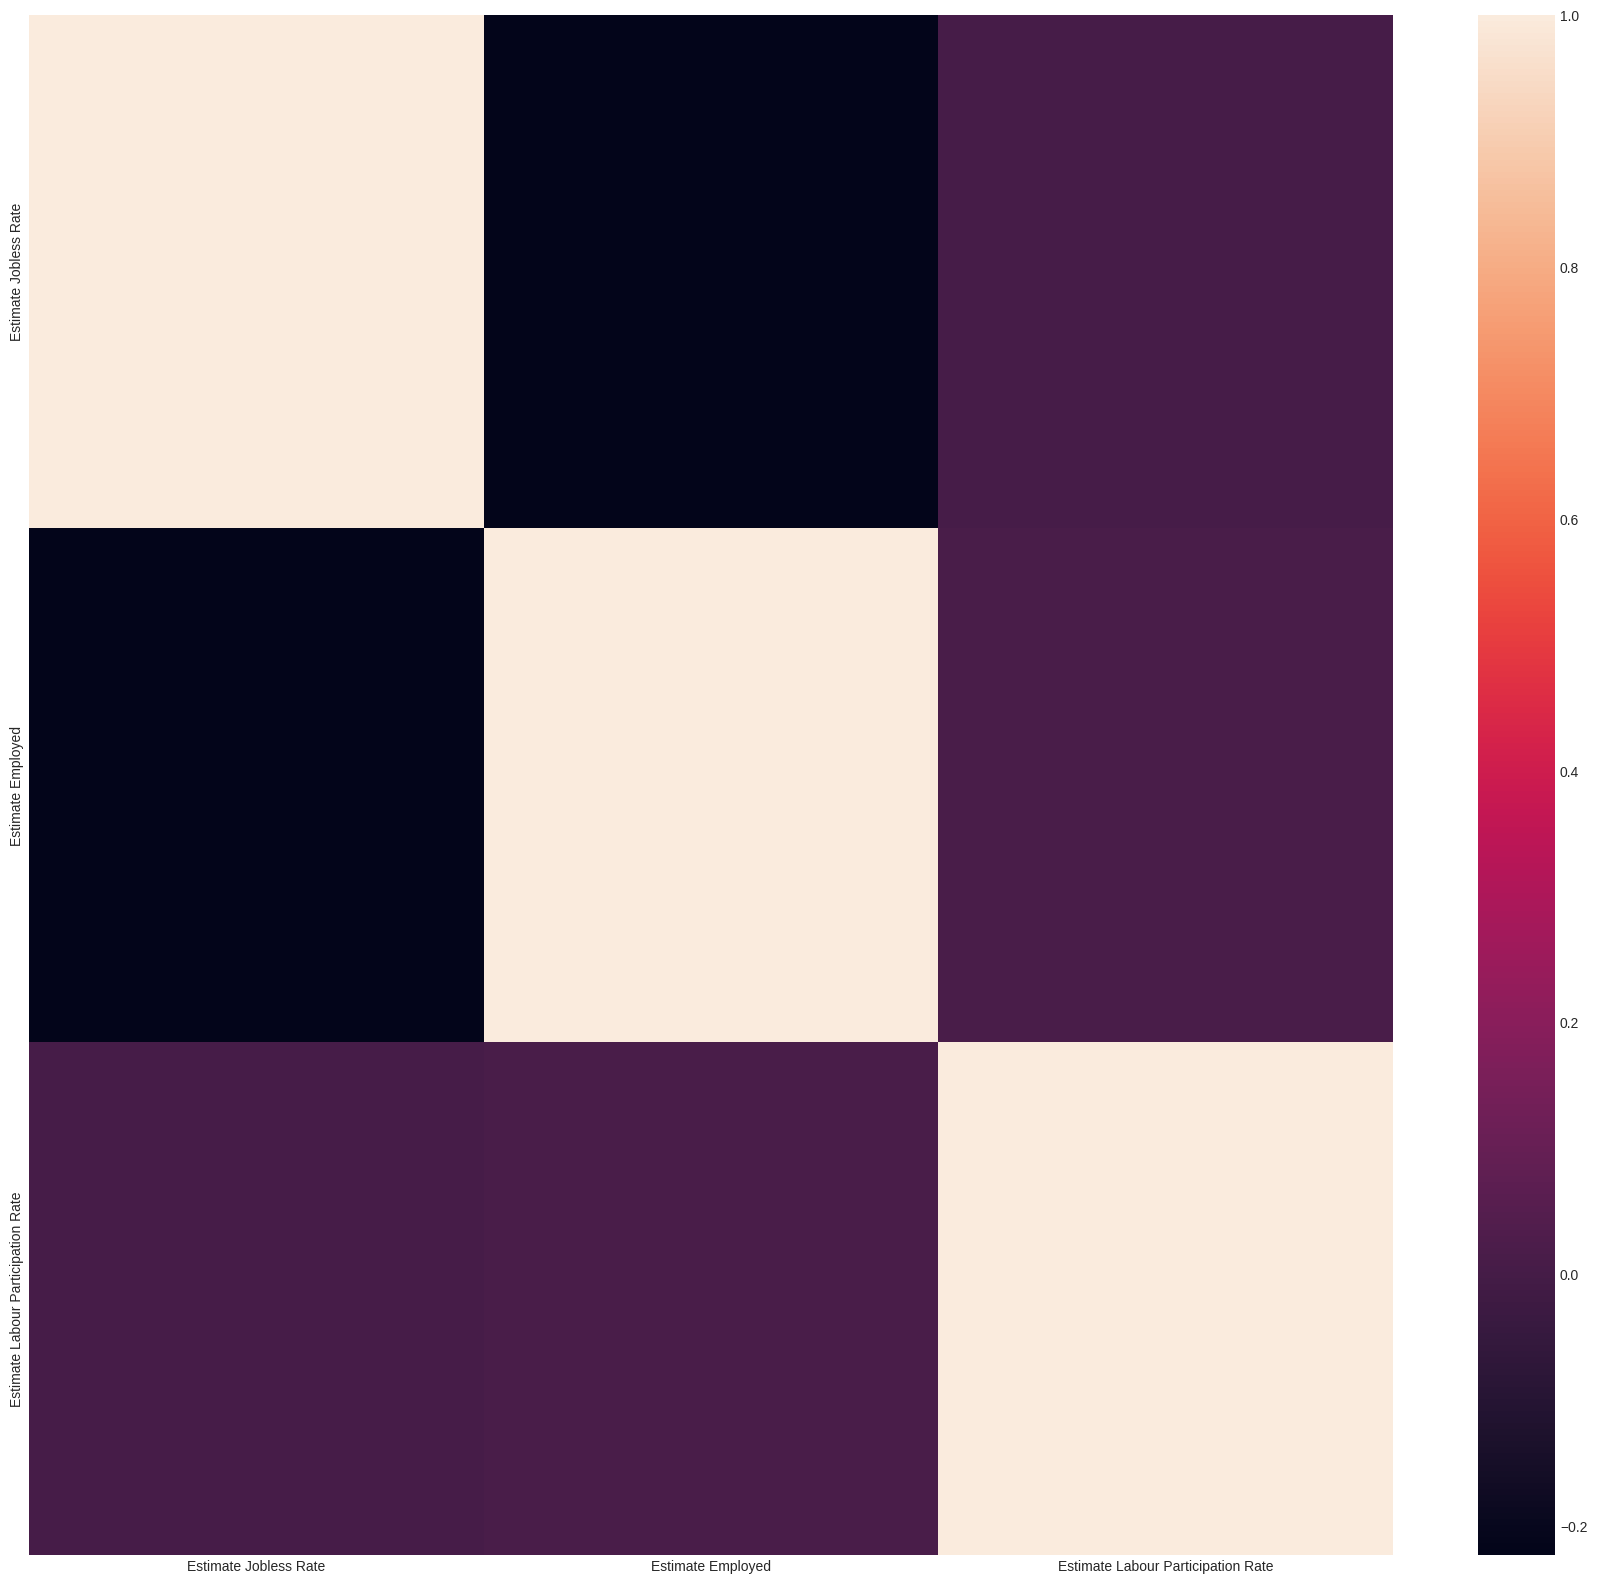

In [24]:
#analyzing the unemployment rate
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(22, 20))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr())
plt.show()

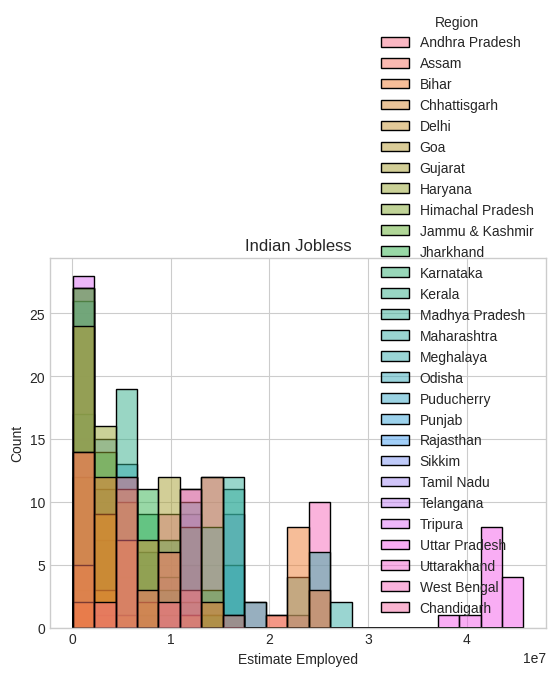

In [25]:
#Analyzing Estimated Employed Rate
plt.title("Indian Jobless")
sns.histplot(x="Estimate Employed", hue="Region", data=df)
plt.show()

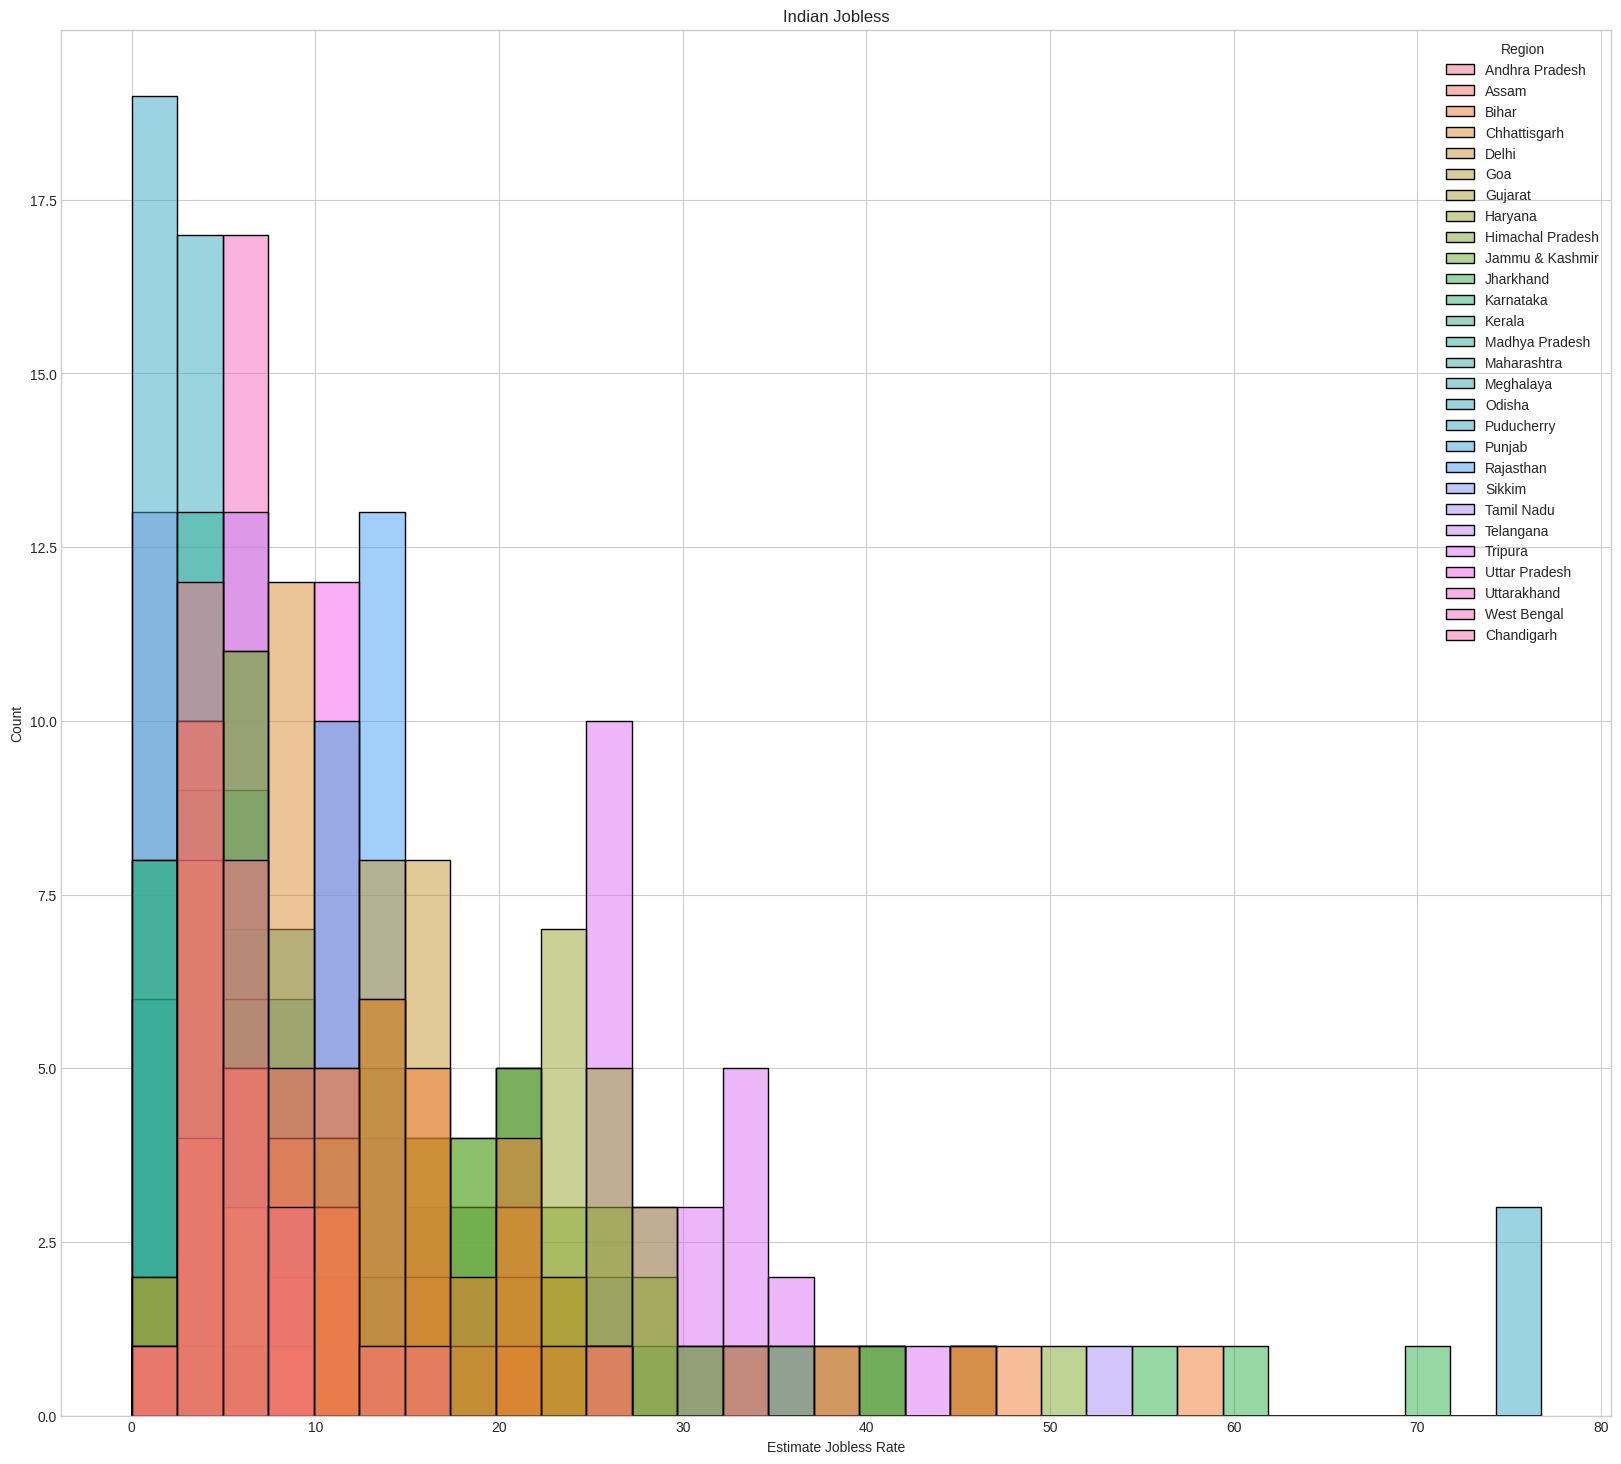

In [27]:
#Analyzing unemployment rate in India's various area.
plt.figure(figsize=(20,18))
plt.title("Indian Jobless")
sns.histplot(x="Estimate Jobless Rate", hue="Region", data=df)
plt.show()

In [40]:
#Anlysing unemployment rate in each state by area
import plotly.express as px
import plotly.express as px

unemp = df[["Area", "Region", "Estimate Jobless Rate"]]
unemp['Estimate Jobless Rate'] = pd.to_numeric(unemp['Estimate Jobless Rate'], errors='coerce')
unemp.dropna(inplace=True)
unemp = unemp.groupby(["Region", "Area"], as_index=False).agg({"Estimate Jobless Rate": "mean"})
figure = px.sunburst(
    unemp,
    path=["Region", "Area"],
    values= "Estimate Jobless Rate",
    width=900,
    height=900,
    color="Estimate Jobless Rate",
    color_continuous_scale="RdYlGn",
    title="Jobless Rate in India"
)

figure.show()
